# Multitaper and Hamonic Ftest


In [1]:
from scipy.signal import lfilter
import math
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

from src.multitaper import MultiTaper_Periodogram #適宜変更

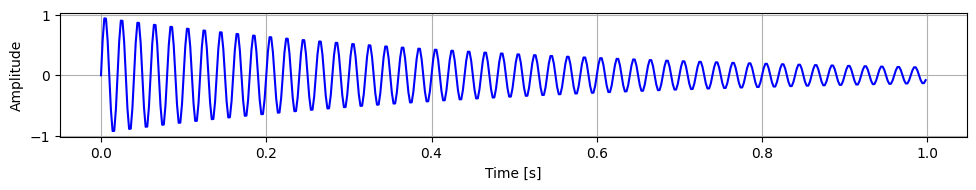

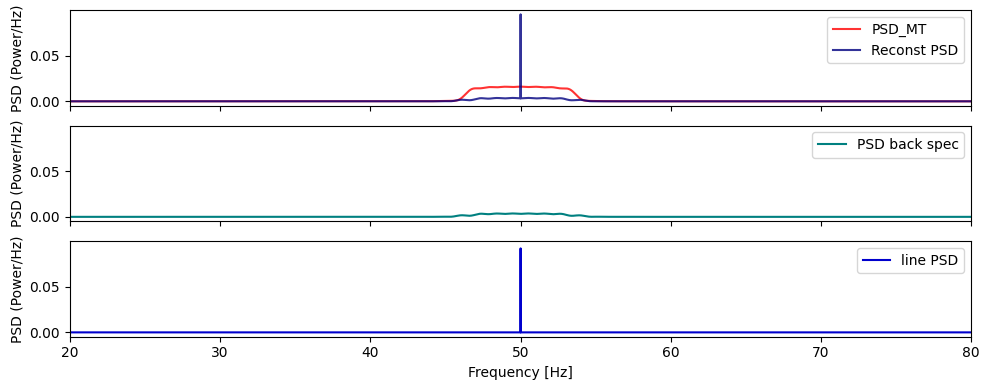

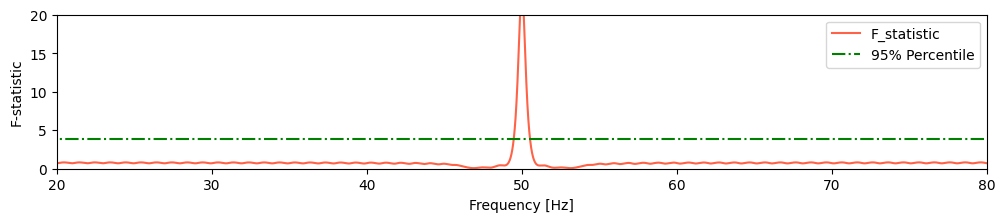

In [2]:

# パラメータ設定
fs_e = 500  # サンプリング周波数 (Hz)
t = np.linspace(0, 1, fs_e, endpoint=False)  # 時間軸（1秒間分のデータ）

f = 50  # 振動の周波数 (Hz)
decay_rate = 2  # 減衰率（大きいほど早く減衰）

# 減衰振動の生成
amplitude = np.exp(-decay_rate * t)  # 減衰を表す指数関数
oscillation = np.sin(2 * np.pi * f * t)  # 正弦波
# oscillation = np.clip(oscillation, -0.6, 0.6)
am_signal = amplitude * oscillation  # 減衰振動

# noisy_am_signal = am_signal
# プロット
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot()
ax.plot(t, am_signal, label="AM Signal", color='b')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.tight_layout()
plt.show()


MTSpec = MultiTaper_Periodogram(NW=4,nfft=2**16)
MTSpec.MT_Spec(am_signal, fs_e)
MTSpec.Harmonic_Ftest(p_level=0.05)

fig, axes = plt.subplots(3, 1, figsize=(10, 4),sharex=True, sharey=True)  # 3行1列のサブプロット

# ---- プロット (PSD_MT，Reconstructed PS) ----
ax = axes[0]
ax.plot(MTSpec.f, MTSpec.mt_psd, '-', label='PSD_MT', alpha=0.8, c='r', lw=1.5)
ax.plot(MTSpec.f, MTSpec.re_psd[1, :], '-', label='Reconst PSD', alpha=0.8, c='navy', lw=1.5)
ax.set_ylabel('PSD (Power/Hz)')
# ax.set_yscale("log")
ax.set_xlim(20,80)
ax.legend()

# ---- プロット (Backpectrum PSD) ----
ax = axes[1]
ax.plot(MTSpec.f, MTSpec.re_psd[0, :], '-', label='PSD back spec', alpha=1, c='teal', lw=1.5)
ax.set_ylabel('PSD (Power/Hz)')
ax.legend()
# ---- プロット (Spectrum Line PSD) ----
ax = axes[2]
ax.plot(MTSpec.f, MTSpec.re_psd[2, :], '-', label='line PSD', alpha=1, c='mediumblue', lw=1.5)
ax.set_ylabel('PSD (Power/Hz)')
ax.set_xlabel('Frequency [Hz]')
ax.legend()
# ---- レイアウトの調整 ----
plt.tight_layout()  # 各プロットの間隔を調整
plt.show()


# ---- プロット (F-statistic) ----
fig = plt.figure(figsize=(12, 2))
ax = fig.add_subplot()
ax.plot(MTSpec.f, MTSpec.F_stat[0, :], '-', label='F_statistic', alpha=1, c='tomato', lw=1.5)
ax.hlines(MTSpec.F_crit, MTSpec.f[0], MTSpec.f[-1], linestyles="-.", color='green', label='95% Percentile')
ax.set_ylabel('F-statistic')
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim(20,80)
ax.set_ylim(0,20)
ax.legend()




## DPSS 

0th 0.9999999997060941
1th 0.9999999723687615
2th 0.9999987916126629
3th 0.9999675893000647
4th 0.9994105128955671
5th 0.9925078649626218
6th 0.9366654986606355


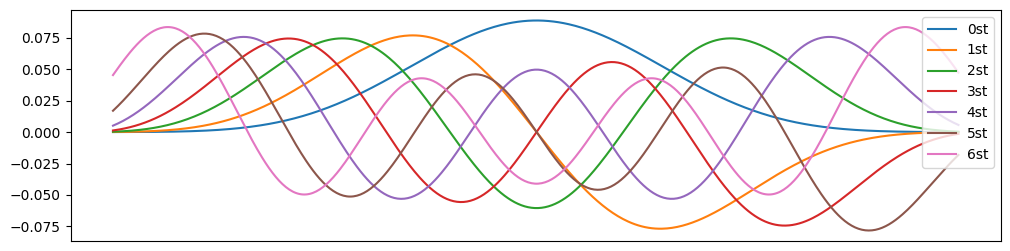

nw:4, N:500, W:4.0


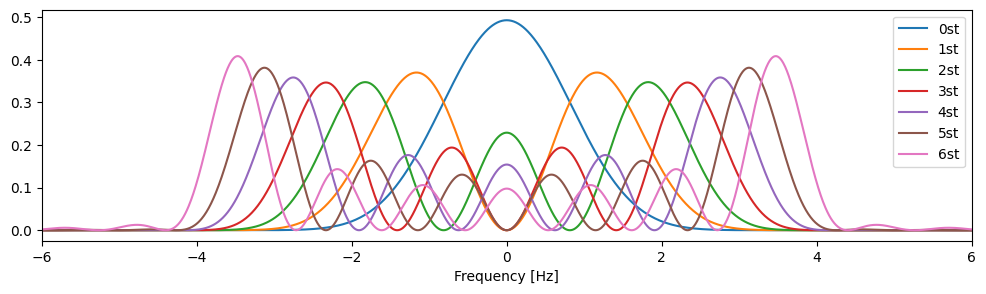

In [3]:
plt.figure(figsize=(12, 3))

for k_i in range(MTSpec.K):
    # k_i 番目のターパー
    plt.plot(MTSpec.k_DPSS[k_i, :], label=f'{k_i}st') 
    print(f"{k_i}th {MTSpec.eigenvalues[k_i]}")

plt.xticks([])
# plt.grid()
plt.legend(loc='upper right')
plt.show()


# FFT の計算
H_k = np.fft.fft(MTSpec.k_DPSS, n=MTSpec.nfft, axis=1)
H_k_PSD = (1 / MTSpec.fs) * np.abs(H_k)**2  

# 周波数軸を対応させる
freqs = np.fft.fftfreq(MTSpec.nfft, d=1/MTSpec.fs)  

# fftshift を適用
H_k_PSD_shifted = np.fft.fftshift(H_k_PSD, axes=1)  # 周波数成分をシフト
freqs_shifted = np.fft.fftshift(freqs)  # 周波数軸もシフト

print(f"nw:{MTSpec.NW}, N:{MTSpec.N}, W:{MTSpec.NW / MTSpec.N * MTSpec.fs}")

# プロット
plt.figure(figsize=(12, 3))
for k_i in range(MTSpec.K):
    plt.plot(freqs_shifted, H_k_PSD_shifted[k_i, :], label=f'{k_i}st') 

# 軸の範囲を適切に設定
plt.xlim(-MTSpec.NW / MTSpec.N * MTSpec.fs * 1.5, MTSpec.NW / MTSpec.N * MTSpec.fs * 1.5)
# plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.legend(loc='upper right')
plt.show()

,Time:512Hz,Epoch,FP1,FP2,F7,Fz,F8,T3,C3,Cz,C4,T4,T5,Pz,T6,O1,O2,Event Id,Event Date,Event Duration
0,0.000000,7840,29068.474609,16043.802734,66537.117188,48942.300781,46747.140625,37714.492188,41452.582031,46752.359375,39487.441406,36383.238281,29403.966797,64742.707031,48880.750000,48013.484375,50548.804688,NaN,NaN,NaN
1,0.001953,7840,28882.087891,15877.711914,66265.804688,48685.671875,46661.941406,37437.453125,41160.683594,46473.718750,39199.546875,36090.765625,29135.296875,64464.402344,48601.859375,47746.492188,50276.796875,NaN,NaN,NaN
2,0.003906,7840,28480.357422,15619.443359,65925.687500,48465.843750,46358.433594,37192.238281,40900.492188,46222.437500,38959.296875,35792.894531,28879.283203,64208.078125,48338.355469,47476.367188,50000.710938,NaN,NaN,NaN
3,0.005859,7840,28442.494141,15361.359375,65869.085938,48370.648438,46011.203125,37144.343750,40838.093750,46162.632812,38914.601562,35716.761719,28817.134766,64145.109375,48262.589844,47398.531250,49921.441406,NaN,NaN,NaN
4,0.007812,7840,28484.421875,15680.270508,66102.539062,48491.339844,46259.292969,37318.671875,41024.398438,46339.375000,39082.535156,35938.675781,28998.343750,64328.062500,48468.093750,47584.843750,50107.140625,NaN,NaN,NaN


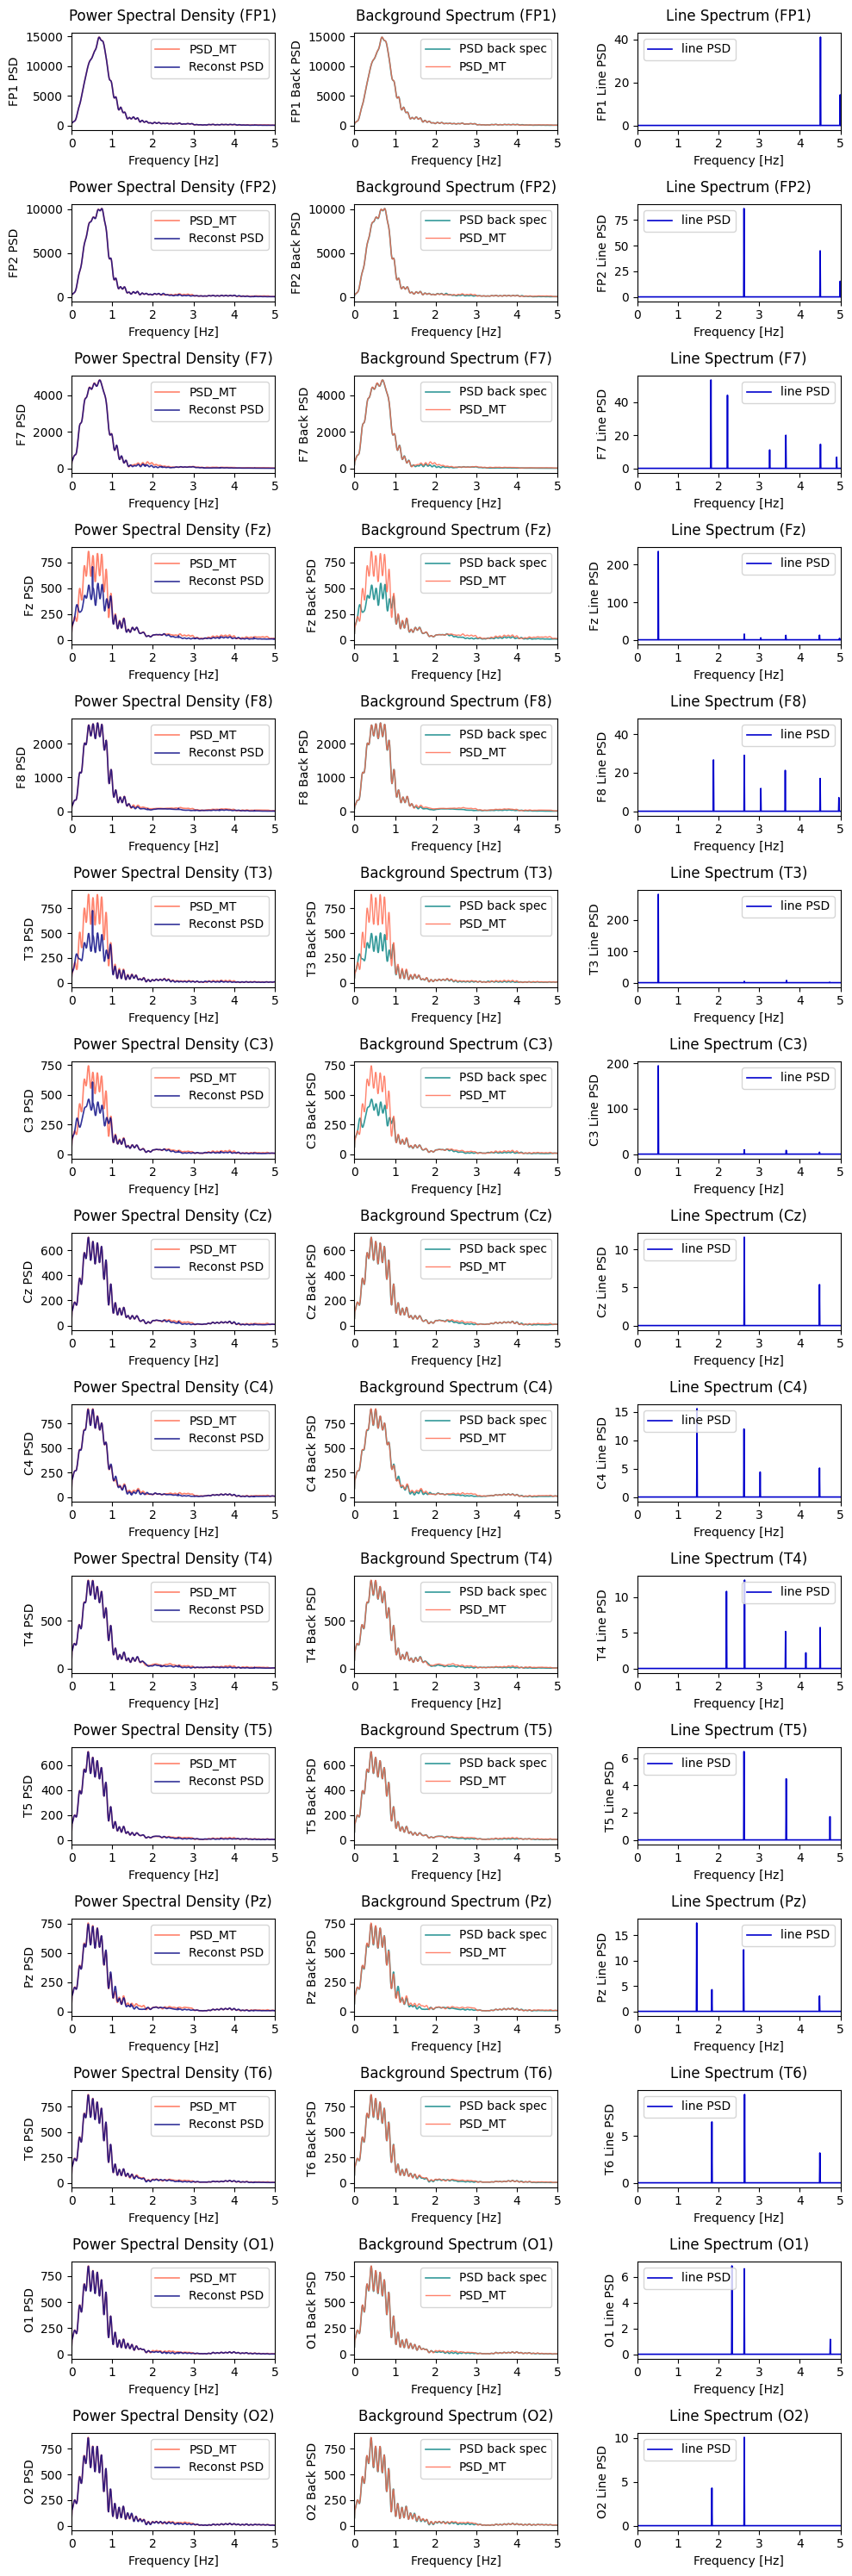

In [26]:

df = pd.read_csv(rf".\test_data\EEG_sample.csv")
display(df.head())

fs_EEG =512
signal_EEG = df["F7"].to_numpy() #T3
time_EEG = df["Time:512Hz"].to_numpy()
EEG_channels = df.columns[2:-3]

def lowpass(x, samplerate, cutoff, gpass, gstop):
    fn = samplerate / 2                           # ナイキスト周波数
    wp = cutoff / fn                              # 通過域端周波数（正規化）
    ws = (cutoff * 0.5) / fn                      # 阻止域端周波数（正規化、少し低めに設定）
    N, Wn = signal.buttord(wp, ws, gpass, gstop)  
    b, a = signal.butter(N, Wn, btype="low")     
    y = signal.filtfilt(b, a, x)                  
    return y                                      
def highpass(x, samplerate, cutoff, gpass, gstop):
    fn = samplerate / 2                           # ナイキスト周波数
    wp = cutoff / fn                              # 通過域端周波数（正規化）
    ws = (cutoff * 0.5) / fn                      # 阻止域端周波数（正規化、少し低めに設定）
    N, Wn = signal.buttord(wp, ws, gpass, gstop)  
    b, a = signal.butter(N, Wn, btype="high")     
    y = signal.filtfilt(b, a, x)                  
    return y                                      
  

# ===== フィルタ設定 =====
def preprocess_EEG(signal_EEG, fs):
    signal_EEG = highpass(signal_EEG, fs, cutoff=0.5, gpass=3, gstop=30)
    signal_EEG = lowpass(signal_EEG, fs, cutoff=60, gpass=3, gstop=40)
    
    # ノッチフィルタ（50 Hz）
    notch_freq = 50  # ノッチ周波数
    Q = 40  # Q値
    b, a = signal.iirnotch(notch_freq, Q, fs)
    signal_EEG = signal.filtfilt(b, a, signal_EEG)
    
    return signal_EEG

# ===== プロットの設定 =====
num_channels = len(EEG_channels)
fig, axes = plt.subplots(num_channels, 3, figsize=(10, num_channels * 2)) 
fireq_lim = (0,5)
for i, ch in enumerate(EEG_channels):
    signal_EEG = df[ch].to_numpy()
    
    # 前処理（フィルタ適用）
    signal_EEG = preprocess_EEG(signal_EEG, fs_EEG)

    # マルチターパースペクトル解析
    MTSpec = MultiTaper_Periodogram(NW=4, nfft=2**16)
    MTSpec.MT_Spec(signal_EEG, fs_EEG)
    MTSpec.Harmonic_Ftest(p_level=0.05)

    # ===== プロット（PSD） =====
    ax = axes[i, 0]
    ax.plot(MTSpec.f, MTSpec.mt_psd, '-', label='PSD_MT', alpha=0.8, c='tomato', lw=1.2)
    ax.plot(MTSpec.f, MTSpec.re_psd[1, :], '-', label='Reconst PSD', alpha=0.8, c='navy', lw=1.2)
    ax.set_ylabel(f"{ch} PSD")
    ax.set_xlabel('Frequency [Hz]')  
    ax.set_xlim(fireq_lim)
    ax.legend()
    ax.set_title(f"Power Spectral Density ({ch})", loc="center", pad=10)  

    # ===== プロット（バックグラウンドPSD） =====
    ax = axes[i, 1]
    ax.plot(MTSpec.f, MTSpec.re_psd[0, :], '-', label='PSD back spec', alpha=0.8, c='teal', lw=1.2)
    ax.plot(MTSpec.f, MTSpec.mt_psd, '-', label='PSD_MT', alpha=0.8, c='tomato', lw=1)
    ax.set_xlim(fireq_lim)
    ax.set_ylabel(f"{ch} Back PSD")
    ax.set_xlabel('Frequency [Hz]')  
    ax.legend()
    ax.set_title(f"Background Spectrum ({ch})", loc="center", pad=10)  

    # ===== プロット（ラインPSD） =====
    ax = axes[i, 2]
    ax.plot(MTSpec.f, MTSpec.re_psd[2, :], '-', label='line PSD', alpha=1, c='mediumblue', lw=1.2)
    ax.set_xlim(fireq_lim)
    ax.set_ylabel(f"{ch} Line PSD")
    ax.set_xlabel('Frequency [Hz]')  
    ax.legend()
    ax.set_title(f"Line Spectrum ({ch})", loc="center", pad=10)  

plt.tight_layout()
plt.show()
